In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('tips.csv')

In [6]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [8]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [9]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [10]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [14]:
for i in ['total_bill', 'tip', 'size']:
    print(df[i].describe(), "\n")

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64 

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64 

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64 



In [18]:
df['sex'].value_counts('%')

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [22]:
cats = ['sex', 'smoker', 'day', 'time']
for i in cats:
    print(df[i].value_counts(), "\n")

Male      157
Female     87
Name: sex, dtype: int64 

No     151
Yes     93
Name: smoker, dtype: int64 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64 

Dinner    176
Lunch      68
Name: time, dtype: int64 



In [23]:
df['female'] = 0

In [24]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,female
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0


In [25]:
df['female'] = df['sex'].replace(['Male', 'Female'], [0, 1])

In [28]:
df['female'].value_counts()

0    157
1     87
Name: female, dtype: int64

In [30]:
pd.crosstab(df['sex'], df['female'])

female,0,1
sex,,
Female,0,87
Male,157,0


In [36]:
df['smoker_dm'] = df['smoker'].replace(['Yes', 'No'], [1, 0])
df['launch'] = df['time'].replace(['Lunch', 'Dinner'], [1, 0])

In [37]:
print(pd.crosstab(df['smoker'], df['smoker_dm']), "\n")
print(pd.crosstab(df['launch'], df['time']))

smoker_dm    0   1
smoker            
No         151   0
Yes          0  93 

time    Dinner  Lunch
launch               
0          176      0
1            0     68


In [39]:
df['weekday'] = df['day'].map( 
    {'Sat':0,
     'Sun':0,
     'Thur':1,
     'Fri':1,})

In [40]:
pd.crosstab(df['weekday'],df['day'])

day,Fri,Sat,Sun,Thur
weekday,,,,
0,0,87,76,0
1,19,0,0,62


In [41]:
import matplotlib.pyplot as plt

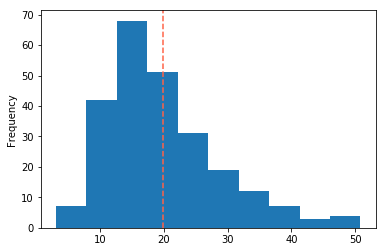

In [44]:
df['total_bill'].plot(kind='hist')
plt.axvline(df['total_bill'].mean(), color='tomato', linestyle='--')

In [53]:
def plot_hist(x):
    df[x].plot(kind='hist')
    plt.axvline(df[x].mean(), color='tomato', linestyle='--')
    plt.title(x)

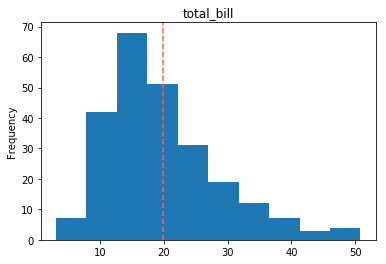

In [54]:
plot_hist('total_bill')

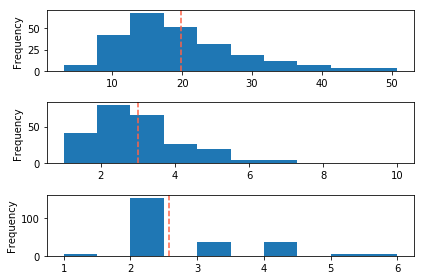

In [52]:
for n, i in enumerate(['total_bill', 'tip', 'size']):
    plt.subplot(3, 1, n + 1)
    plot_hist(i)
    plt.tight_layout()

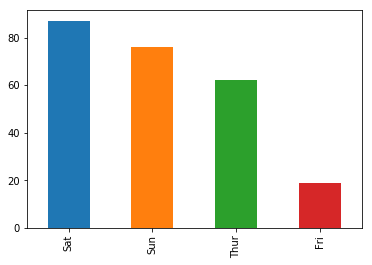

In [55]:
df['day'].value_counts().plot(kind='bar')

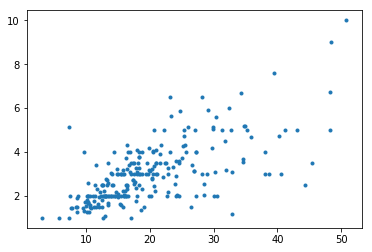

In [65]:
plt.plot(df['total_bill'], df['tip'], '.')

In [58]:
import seaborn as sns

C:\Users\josea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josea\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


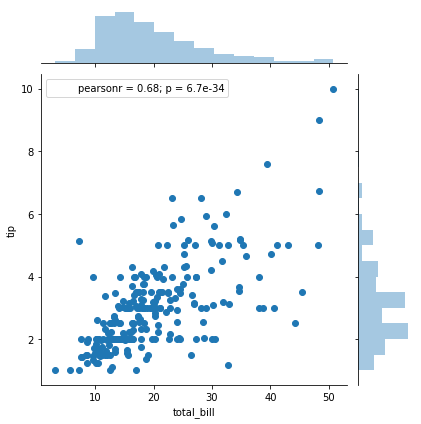

In [89]:
sns.jointplot(df['total_bill'], df['tip']);

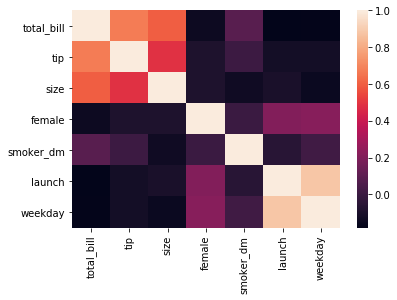

In [72]:
sns.heatmap(df.corr())

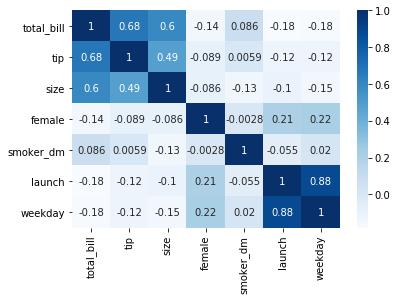

In [71]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')


# Regresión

$$
y = \beta_{0} + \beta_{1}\cdot x + \varepsilon_(i)
$$

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
model1 = smf.ols("tip ~ total_bill", df)

In [86]:
model1 = model1.fit()

In [87]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           6.69e-34
Time:                        12:48:40   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model2 = smf.ols("tip ~ total_bill + size", df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           9.67e-34
Time:                        12:58:54   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""